# Pegelstände

In [2]:
import pandas as pd
import requests
from datetime import timezone, datetime, timedelta

import sys
from io import StringIO

import os
import sys
#sys.path.append(os.path.dirname((os.path.dirname(__file__))))
#from helpers import *

In [3]:
def get_data(url):
    r = requests.get(url)
    df = pd.read_csv(StringIO(r.text), sep=",")

    # Convert Time
    df['Time'] = pd.to_datetime(df['Time'])

    # From 7.7
    df = df[df.Time >= '2021-07-07 00:00']
    
    return df

def get_last_update(df):
    return df.tail(1).iloc[0]['Time'].astimezone('Europe/Berlin').strftime('%d. %-m., %H.%M Uhr')



## Zürichsee
https://q.st.nzz.ch/item/6b50824faafb1db49507dbc8cc452e5c

In [31]:
# Get Data
chartid = '6b50824faafb1db49507dbc8cc452e5c'
url = 'https://www.hydrodaten.admin.ch/lhg/az/dwh/csv/BAFU_2209_PegelRadarSchacht.csv'
df = get_data(url)

# Zeitzone umwandeln
df['Zeitstempel'] = df['Time'].apply(lambda x: x.astimezone('Europe/Berlin').strftime('%Y-%m-%d %H:%M'))

# Gefahrenzone hinzufügen
df['2'] = 406.25
df['3'] = 406.4
df['4'] = 406.6
df['5'] = 406.85

# Rename
df = df.rename(columns = {'BAFU_2209_PegelRadarSchacht': 'Messwert; Gefahrenstufe:'})

# Resample (1 Entry per hour)
df = df.resample('1H', on='Time').first()

# Set Index
df = df.set_index('Zeitstempel')


"""
update_chart(
    id = chartid,
    data = df[['Messwert; Gefahrenstufe:', '2', '3', '4', '5']],
    notes = "Die Messwerte sind Rohdaten, welche Fehler enthalten können.<br />Letzte Messung: %s" 
      % get_last_update(df)
)
"""

'\nupdate_chart(\n    id = chartid,\n    data = df[[\'Messwert; Gefahrenstufe:\', \'2\', \'3\', \'4\', \'5\']],\n    notes = "Die Messwerte sind Rohdaten, welche Fehler enthalten können.<br />Letzte Messung: %s" \n      % get_last_update(df)\n)\n'

In [32]:
len(df)

168

<AxesSubplot:xlabel='Zeitstempel'>

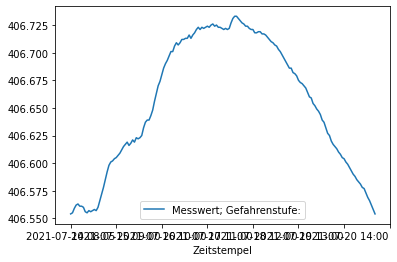

In [33]:
df[['Messwert; Gefahrenstufe:']].plot()

<AxesSubplot:xlabel='Zeitstempel'>

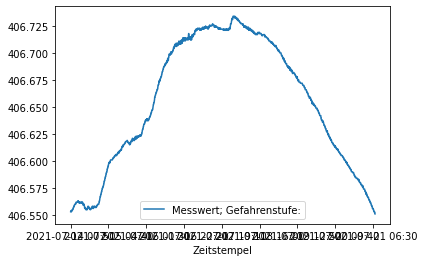

In [7]:
df[['Messwert; Gefahrenstufe:']].plot()

## Limmat
https://q.st.nzz.ch/editor/chart/6b50824faafb1db49507dbc8cc476129

In [142]:
# Get Data
url = 'https://www.hydrodaten.admin.ch/lhg/az/dwh/csv/BAFU_2099_AbflussRadarSchacht.csv'
df = get_data(url)

# Zeitzone umwandeln
df['Zeitstempel'] = df['Time'].apply(lambda x: x.astimezone('Europe/Berlin').strftime('%Y-%m-%d %H:%M'))

# Gefahrenzone hinzufügen
df['2'] = 350
df['3'] = 450
df['4'] = 530
df['5'] = 600

# Rename
df = df.rename(columns = {'BAFU_2099_AbflussRadarSchacht': 'Messwert, Gefahrenstufe:'})

df[['Zeitstempel', 'Messwert, Gefahrenstufe:', '2', '3', '4', '5']].to_clipboard(index=False)

## Sihl
https://q.st.nzz.ch/item/6b50824faafb1db49507dbc8cc481e93

In [143]:
# Get Data
url = 'https://www.hydrodaten.admin.ch/lhg/az/dwh/csv/BAFU_2176_AbflussRadarSchacht.csv'
df = get_data(url)

# Zeitzone umwandeln
df['Zeitstempel'] = df['Time'].apply(lambda x: x.astimezone('Europe/Berlin').strftime('%Y-%m-%d %H:%M'))

# Gefahrenzone hinzufügen
df['2'] = 100
df['3'] = 200
df['4'] = 300
df['5'] = 400

# Rename
df = df.rename(columns = {'BAFU_2176_AbflussRadarSchacht': 'Messwert, Gefahrenstufe:'})

df[['Zeitstempel', 'Messwert, Gefahrenstufe:', '2', '3', '4', '5']].to_clipboard(index=False)


## Badewannen

In [114]:
badewanne = 0.18

sihl_m2_gester = 12
sihl_m2_heute = 29

limmat_m2_gestern = 276
limmat_m2_heute = 297

In [115]:
print("Sihl gestern 12 Uhr: %s Badewannen/s" % round(sihl_m2_gester / badewanne))
print("Sihl heute 12 Uhr: %s Badewannen/s" % round(sihl_m2_heute / badewanne))

print("Limmat gestern 12 Uhr: %s Badewannen/s" % round(limmat_m2_gestern / badewanne))
print("Limmat heute 12 Uhr: %s Badewannen/s" % round(limmat_m2_heute / badewanne))

Sihl gestern 12 Uhr: 67 Badewannen/s
Sihl heute 12 Uhr: 161 Badewannen/s
Limmat gestern 12 Uhr: 1533 Badewannen/s
Limmat heute 12 Uhr: 1650 Badewannen/s


In [133]:
# Differenz Gestern 12 Uhr bis heute 12 Uhr
anstieg = round(df.iloc[-1]['Messwert, Gefahrenstufe:'] - df[df.Time >= '2021-07-12 11:00'].iloc[0]['Messwert, Gefahrenstufe:'], 2)

In [144]:
anstieg = 0.05
lake = 88.66 * 1000 * 1000
kubik = lake * anstieg
badewanne = 0.18

round(kubik / badewanne)

24627778

In [125]:
pool = 50 * 25 * 2

(lake * anstieg) / pool

1773.2

In [123]:
pool

2500

In [150]:
katzensee = 0.84 * 1000 * 1000#kubikmeter
katzensee = 840000
kubik / katzensee

5.277380952380953

In [158]:
((88.66 * 1000 * 1000) * 0.05) / 

4433000.0

In [161]:
50 * 25 * 2

2500